# Predict Ames House Price with Advanced Regression Techniques

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png" alt="CV">

## Table of Contents

- **I. Introduction**

- **II. Exploratory Data Analysis**

    - 1. Sale Price
   
    - 2. Numerical Variables
   
    - 3. Correlations Between Numerical Features
 
- **III. Data Preprocessing and Feature Engineering**

    - 1. Missing Values
    
    - 2. Feature Engineering
    
        - a. Create New variables
        - b. Label Encoding
        - c. Numerical Variables to Factors
        - d. Outliers
    - 3. Skewness and Normalizing Data
     
       - a. Scaling Data
       - b. One-hot Encoding
       
- **IV. Modeling**

    - 1. Regularized Regressions
        - a. Ridge Regression
        - b. Lasso Regression
    - 2. XGBoost
    
    - 3. LightGBM
    
    - 4. Averaging model

- **V. Conclusion**
- **VI. Reference**

# I. Introduction
After finished my last semester in grad school, I want to advance my skill sets in regression and machine learning by doing a complete regression project.  I was looking for competitions on Kaggle, and saw House Prices: Advanced Regression Techniques competition. 

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. The data set describing the sale of individual residential property in Ames, Iowa from 2006 to 2010. The data set contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges me to predict the final price of each home.

First, I perform comprehensive exploratory data analysis to understand the relationships between variables and detect other issues such as missing values, outliers and skewness. After that, I clean the data and work on feature engineering. Then, I build machine learning models to predict house price including Ridge, Lasso Regression, XBGBoost and LightBGM.

#### Import necessary libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
sns.set_style('darkgrid')

#### Load and Combine Data

In [39]:
#Load Data
train = pd.read_csv('/Users/chauchu/Downloads/house-prices-advanced-regression-techniques/train.csv', index_col = 'Id')
test = pd.read_csv('/Users/chauchu/Downloads/house-prices-advanced-regression-techniques/test.csv', index_col = 'Id')

#Separate Variables
X_train = train.drop('SalePrice', axis = 1)
y = train['SalePrice']

#Combine Train and Test Data
X = pd.concat([X_train, test], axis = 0)

#### Understand the Data

In [40]:
print("Train's Data Size: ", X_train.shape)
print("Test's Data Size: ", test.shape)

Train's Data Size:  (1460, 79)
Test's Data Size:  (1459, 79)


In [41]:
#Numerical Columns
num_col = list(X_train.select_dtypes(exclude = ["object"]).columns)
print("There are " + str(len(num_col)) + " numerical columns: ", num_col)

There are 36 numerical columns:  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [42]:
#Categorical Columns
cat_col = list(X_train.select_dtypes(include = ['object']).columns)
print("There are " + str(len(cat_col)) + " categorical columns: ", cat_col)

There are 43 categorical columns:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


# II. EDA

## 1. Sale Price (Y)

Text(0.5, 1.0, 'House Price Distribution')

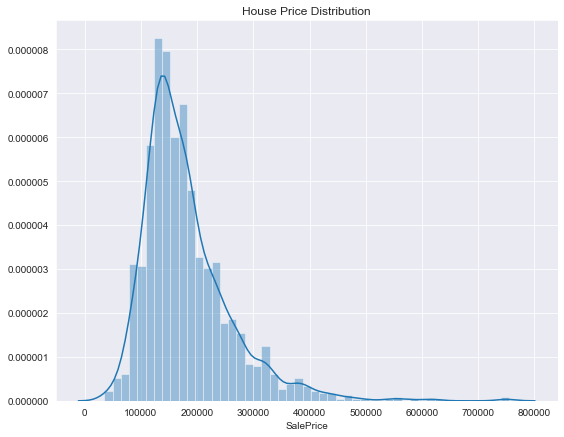

In [43]:
plt.figure(figsize = (9,7))
sns.distplot(y)
plt.title('House Price Distribution')

From the plot above, we can see that Sale Price is right-skewed. Let's check its Skewness and Kurtosis!

In [44]:
from scipy.stats import skew, kurtosis 
print('Skewness of Sales Price :', skew(y))
print('Kurtosis of Sales Price: ', kurtosis(y))

Skewness of Sales Price : 1.880940746034036
Kurtosis of Sales Price:  6.509812011089439


## 2. Numerical Variables

Let's take a look at top 10 high correlated variables with Sale Price

In [45]:
num_corr = train.select_dtypes(exclude = ["object"]).corr().SalePrice.sort_values(ascending = False).head(11)
num_corr

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Let's look into details of these variables

#### Overall Quality, Number of Garage, Number of Full Bath & Number of Room

Text(0.5, 1.0, 'House Sale Price by Num Room')

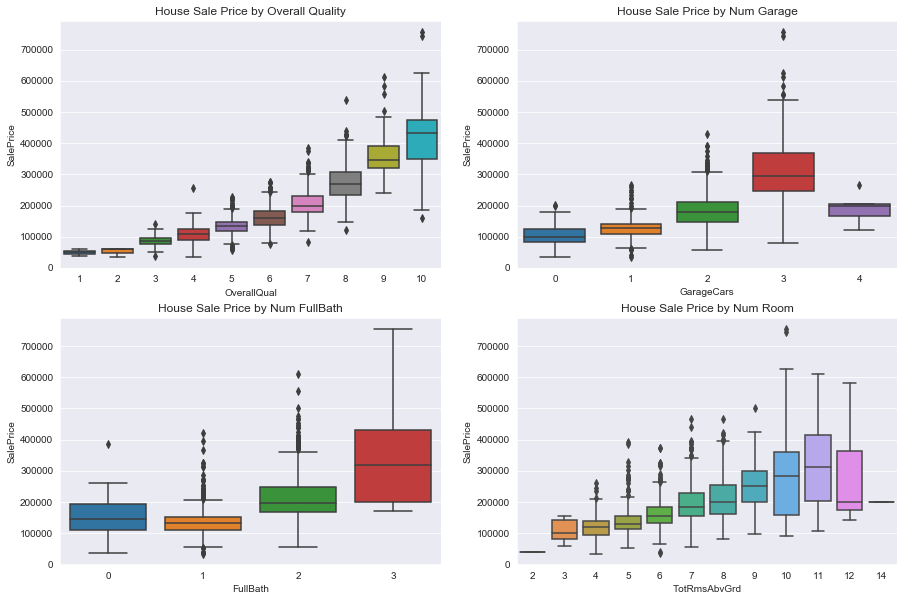

In [46]:
plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.boxplot(x='OverallQual', y = 'SalePrice', data = train)
plt.title('House Sale Price by Overall Quality')

plt.subplot(2, 2, 2)
sns.boxplot(x='GarageCars', y = 'SalePrice', data = train)
plt.title('House Sale Price by Num Garage')

plt.subplot(2, 2, 3)
sns.boxplot(x='FullBath', y = 'SalePrice', data = train)
plt.title('House Sale Price by Num FullBath')

plt.subplot(2, 2, 4)
sns.boxplot(x='TotRmsAbvGrd', y = 'SalePrice', data = train)
plt.title('House Sale Price by Num Room')

As I expected, the higher the Overall Quality, the higher the Price. Similarly, the more of number of Garage, Full Bath, Room, the higher the price. Interestingly, houses with 3 garages have higher price than houses with 4, and houses with 11 Rooms have higher price than houses with 14 ones.

#### Living Area

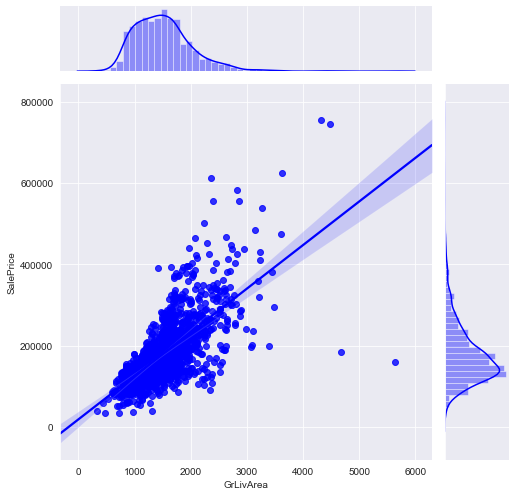

In [47]:
sns.jointplot("GrLivArea", "SalePrice", data=train,
                  kind="reg", truncate=False,
                  color="b", height=7)

From the plot above, we can see that Living Area has ***linear relationship*** with Sale Price. There're also few ***outliers*** in the data, including 2 houses with price less than $200,000 and Living Area > 4,000

#### Year Built
The average of house price increases over time. However, some houses in the 1900s also have high price compare to houses in 2000s. This is also an important variable to predict House Price. Later on, I will transform this variable to Age of the house.

Text(0.5, 1.0, 'House Price by Year Built')

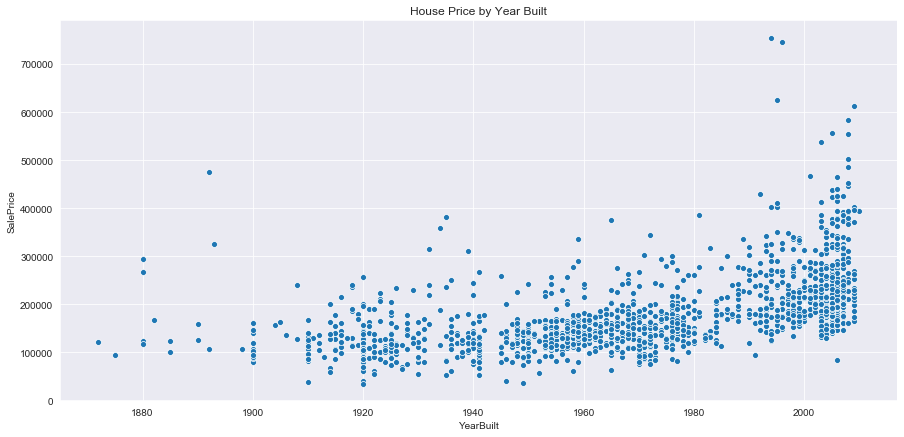

In [48]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train)
plt.title('House Price by Year Built')

### 3. Correlations Between Numerical Features

Text(0.5, 1, 'Correlation Heatmap for top 10 high correlated variables with Sale Price')

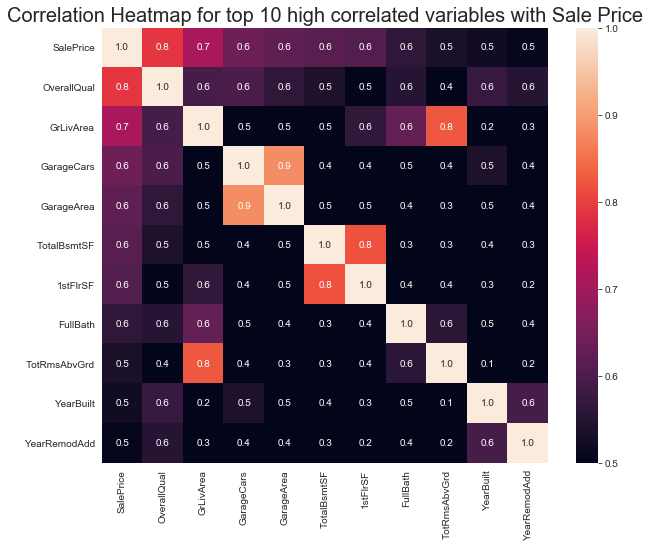

In [49]:
top_corr = list(num_corr.index.values)
top_corr = train[top_corr].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr,
            annot=True,
            fmt='.1f',
            vmin=0.5,
            vmax=1)
plt.title('Correlation Heatmap for top 10 high correlated variables with Sale Price', fontsize = 20)

Based on the heatmap above, we can see there is an issue with ***multicollinearity*** in our training data. Below features are highly correlated:

- GrLivArea and TotRmsAbvGrd
- GarageCars and GarageArea
- 1stFlrSF and TotalBsmtSF

Let's take another look at the correlations of all numerical variables in the dataset to check if there's any other ***multicolinearity***!

Text(0.5, 1, 'Correlation Heatmap')

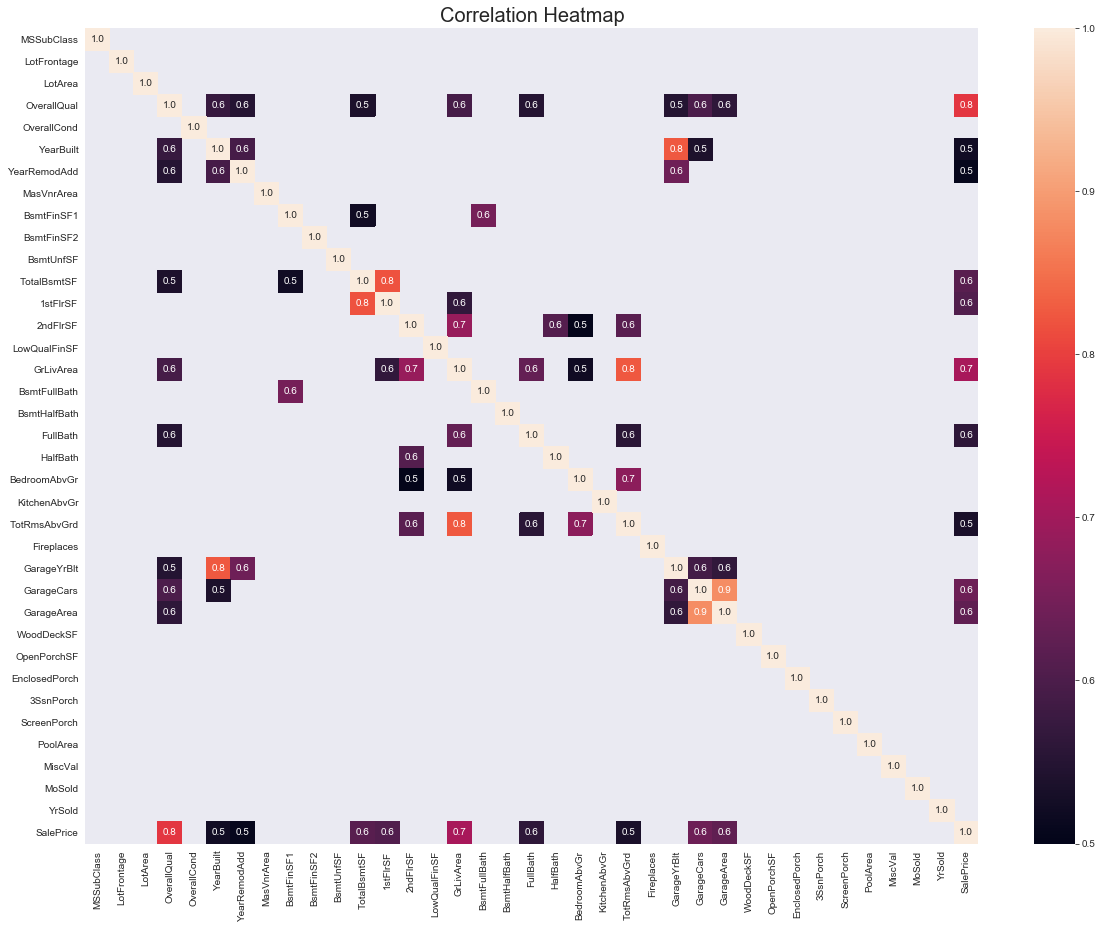

In [50]:
corr_num = train.select_dtypes(exclude = ['object']).corr()
high_corr_num = corr_num[abs(corr_num) >= 0.5]
plt.figure(figsize=(20, 15))
sns.heatmap(high_corr_num,
            annot=True,
            fmt='.1f',
            vmin=0.5,
            vmax=1)
plt.title('Correlation Heatmap', fontsize = 20)

Besides the features which I mention above, there are also high correlations between other variables:

- GarageYrBlt and YearBuilt

**Multicollinearity** refers to predictors that are correlated with other predictors in the model. Severe multicollinearity is an issue. It can increase the variance of the coefficient estimates and make the estimates very sensitive to minor changes in the model. The result is that the coefficient estimates are unstable and difficult to interpret. Therefore, I will remove a feature that has a lower correlation with SalePrice for each pair of highly correlations that I mentioned above

## III. Data Processing & Feature Engineering

### 1. Missing Values

In [51]:
missing_data_col = X.isnull().sum()
missing_data_percent = X.isnull().sum()*100/len(X)

missing_data = pd.DataFrame({'Total': missing_data_col, 'Percent': missing_data_percent})
missing_data = missing_data[missing_data['Total'] > 0].sort_values(by='Total', ascending = False)

total_feature = missing_data.shape[0]
print('There are total', total_feature, 'features missing values')
print('Top 10 features missing values')
missing_data.head(10)

There are total 34 features missing values
Top 10 features missing values


,Total,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071
GarageYrBlt,159,5.447071


Base on the data description, I will divide the missing features into 3 groups.
1. **Numerical Features where NA means no features:** GarageArea, GarageCars, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, MasVnrArea. I will replace NA values with 0
2. **Categorical variables where NA means no feature:** PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, MasVnrType. I will replace NA values with 'None'
3. **Other Variables** Functional, MSZoning, Electrical, KitchenQual, Exterior1st, Exterior2nd, SaleType, Utilities, LotFrontage, GarageYrBlt
    - impute Functional, MSZoning, Electrical, KitchenQual, Exterior1st, Exterior2nd, SaleType, Utilities with their modes
    - impute LotFrontage with its mean
    - impute GarageYrBlt with YearBuilt

In [52]:
#First Group
first = ['GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2',
         'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']
X[first] = X[first].fillna(0)

#Second Group
second = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
          'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
          'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
X[second] = X[second].fillna('None')

#Third Group
third = ['Functional', 'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st',
    'Exterior2nd', 'SaleType', 'Utilities']

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
X[third] = imp.fit_transform(X[third])

X['LotFrontage'].fillna(X['LotFrontage'].mean(), inplace = True)
X['GarageYrBlt'].fillna(X['YearBuilt'], inplace = True)

Let's check if there's any missing value left!

In [53]:
sum(X.isnull().sum())

0

### 2. Feature Engineering

#### a. Adding new Variables

In this part, I'm creating new features from weaker features in the training data. 
1. totalSqFeet: total area in the house. As we see from the correlation plot above, the surface area of each floor has low correlation with house price. The linear relationship becomes much stronger when we sum the area up! It actually becomes the strongest feature in the dataset.
2. totalBathroom: total number of bathrooms
3. Age: age of the house
    
After that, I will drop unnecessary variables.

In [54]:
X['totalSqFeet'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
X['totalBathroom'] = X['FullBath'] + X['BsmtFullBath'] + 0.5 * (X['HalfBath'] + X['BsmtHalfBath'])
X['Age'] = X['YrSold'] - X['YearBuilt']

#### b. Label Encoding
We will label encoding ordinal variables.

In [55]:
ordinal_col = ["Alley", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "BsmtQual", "ExterCond", "ExterQual", "FireplaceQu", "Functional",
    "GarageCond", "GarageQual", "HeatingQC", "KitchenQual", "LandSlope",
    "LotShape", "PavedDrive", "PoolQC", "Street", "Utilities"]

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ordinal_col:
    X[col] = le.fit_transform(X[col])

#### c. Numerical Variables to Factors
First, let's take a look at Year Sold and Month Sold!

In [57]:
print(X['YrSold'].unique())
print(X['MoSold'].unique())

[2008 2007 2006 2009 2010]
[ 2  5  9 12 10  8 11  4  1  7  3  6]


Year Sold also includes the economic crisis era and house price can defintely be affected by this variable. Therefore, I will change this variable to factor. Similarly, I will change Month Sold to categorical variable.

Another variable we should change to factor is MSSubClass. These classes are coded as numbers, but really are categories	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [59]:
factor = ['YrSold', 'MoSold', 'MSSubClass']
for col in factor:
    X[col] = X[col].apply(str)

#### d. Outliers
Since regression models are very sensitive with outliers, I'm going to delete them from the data set.

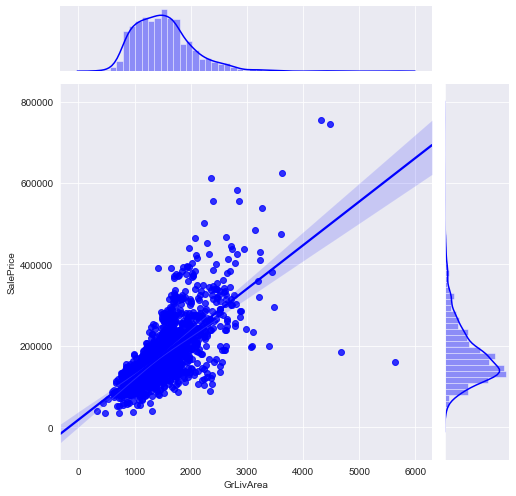

In [58]:
sns.jointplot("GrLivArea", "SalePrice", data=train,
                  kind="reg", truncate=False,
                  color="b", height=7)

In [60]:
index_outlier = train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)].index
X.drop(index_outlier, axis = 0, inplace = True)
y.drop(index_outlier, axis = 0, inplace = True)

### 3. Skew & Normalizing Data


One of the assumptions of linear regression is for any value of independent variables Xs, Y is normally distributed. Let's check if SalePrice follows this assumption!

First, I'm going to write a function to visualize the distribution of different variables:
1. Distribution plot with normal distribution fitted curve
2. Quantile-Quantile plot

In [61]:
from scipy import stats
from scipy.stats import norm

def plotnorm(feature):
    fig, axes = plt.subplots(1, 2, figsize =(10, 5))
    sns.distplot(feature, fit = norm, ax = axes[0])
    axes[0].set_title('Distribution Plot')

    axes[1] = stats.probplot((feature), plot=plt)
    plt.tight_layout()

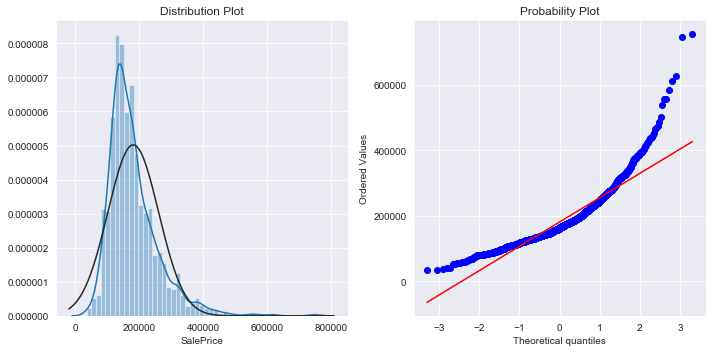

In [62]:
plotnorm(y)

SalePrice is right-skewed. Therefore, I'm going to use log(1+X) to transform the data!

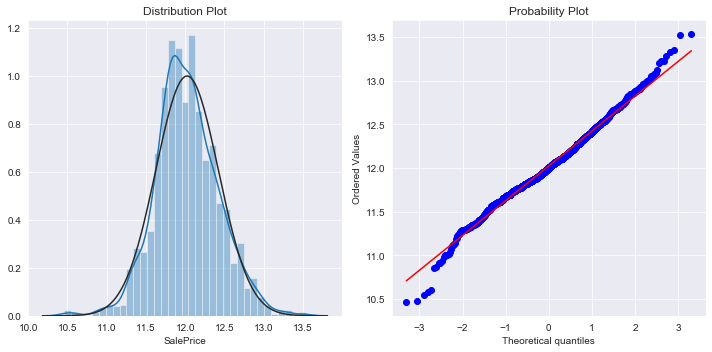

In [63]:
y = np.log(1 + y)
plotnorm(y)

#### Skewness in Numerical Variables

If absolute value of skewness of a variable < 0.5 then it is **approximately symmetric**

If absolute value of skewness of a variable between 0.5 and 1 then it is **moderately skewed**

If absolute value of skewness of a variable > 1 then it is **highly skewed**

Let's take a look at how skew our numerical variables are.


In [64]:
skewvar = train.skew().sort_values(ascending = False)
skewvar[abs(skewvar) > .75]

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
dtype: float64

I've mentioned Living Area above. From the plot, we can see that it's right-skewed.

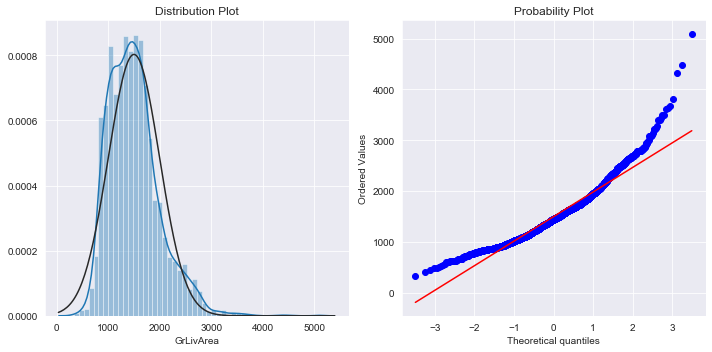

In [65]:
plotnorm(X.GrLivArea)

Let's transform all the highly skew numerical variables using log(1+X)!

In [66]:
skewcol = list(skewvar[abs(skewvar) > .75].index)
skewcol.remove('SalePrice')
skewcol.remove('MSSubClass')
for col in skewcol:
    X[col] = np.log(1 + X[col])

Let's take a look at Living Area again after it was log-transformed. We can see that its skewness' been fixed!

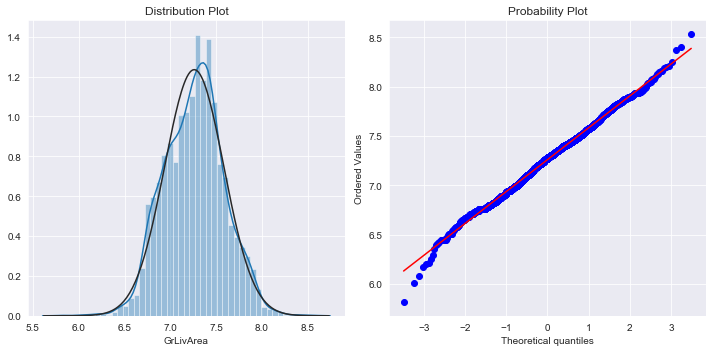

In [67]:
plotnorm(X.GrLivArea)

### Scaling Data
 I will use RobustScaler to transform the training data.

In [68]:
from sklearn.preprocessing import RobustScaler
num_col = list(X.select_dtypes(exclude = ['object']).columns)
scale = RobustScaler()
X[num_col] = scale.fit_transform(X[num_col])

### One-hot Encoding
I'm going to do one-hot encoding for the Nominal Categorical Variables

In [69]:
X = pd.get_dummies(X, drop_first=True)
print("X.shape:", X.shape)

X.shape: (2917, 235)


After preprocessing the train and test data, I split them again to perform modeling

In [70]:
ntest = len(test)
X_train = X.iloc[:-ntest, :]
X_test = X.iloc[-ntest:, :]
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print(X_train.columns)

X_train.shape: (1458, 235)
X_test.shape: (1459, 235)
Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'Utilities',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=235)


## IV. Modeling

In machine learning practice, it's a common practice to split the entire training data to training and test data set. However, a model may work very well on a set of train data but have a poor performance on other sets of unseen data.

Therefore, a common solution is to use **cross-validation (CV)**. Using ***k-fold CV***, the training set is split into 5 smaller sets. Then, for each fold, a model is trained using the other 4 folds and evaluated on the remaining fold. The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="400" height="200" alt="CV">

To evaluate my models, I will use **Root Mean Squared Logarithmic Error (RMSLE)**, **R-square**, and **Mean Absolute Error**. Since I have transformed the target variable to *log(1+y)* , the **Mean Squared Error** for *log(1+y)* is the **Mean Squared Logarithmic Error** for `SalePrice`.


First, I'm going to write a function to return all the values to evaluate my models.

In [183]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error

In [210]:
def result(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    y_pred = model.predict(X_train)
    r_square = r2_score(y, y_pred)
    mean_abs_error = mean_absolute_error(y, y_pred)
    print('RMSLE:               ', rmse.mean())
    print('R-square:            ', r_square)
    print('Mean Absolute Error: ', mean_abs_error)

### 1.  Regularized Regressions
The performance of the entire model is based on the hyper parameter values specified, and the process of stipulating values for hyper parameters can be a nightmare sometimes. In order to determine the optimal values for hyper parameter in my  Regularized Regression Models ($\lambda$), I'm going to use **GridSearchCV**, a part of `sklearn` library.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

### a. Ridge Regression
In the regularized linear regression (Ridge), we try to minimize:

$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right)^2 \right) + \frac{\lambda}{2m} \left( \sum_{j=1}^n \theta_j^2 \right)$$

where $\lambda$ is a regularization parameter which controls the degree of regularization (thus, help preventing overfitting). The regularization term puts a penalty on the overall cost J. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well.

In [207]:
#Specify different values of alpha for the model
parameters= [{'alpha': list(np.arange(10, 20, 0.02))}]

#Use GridSearchCV to find the best alpha value
RR=Ridge()
grid_ridge = GridSearchCV(RR, parameters,cv=5)
grid_ridge.fit(X_train, y) 

#Best Ridge Model with Score
ridge = grid_ridge.best_estimator_ 
ridge

Ridge(alpha=15.499999999999883, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [211]:
result(ridge)

RMSLE:                0.113869589021474
R-square:             0.9373459708141676
Mean Absolute Error:  0.07007560198347418


### b. Lasso Regression

Lasso Regression is very similar to Ridge regression. One difference is that in the regularization term, instead of using **sum of squared of $\theta$**, we use **sum of absolute value of $\theta$**:

$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right)^2 \right) + \frac{\lambda}{2m} \left( \sum_{j=1}^n |\theta_j| \right)$$

In [212]:
#Specify different values of alpha for the model
parameters= [{'alpha': list(np.arange(0.001, 5,0.01))}]

#Use GridSearchCV for the Model
las = Lasso()
Grid_las = GridSearchCV(las, parameters,cv=5)
Grid_las.fit(X_train, y)

#Best Lasso Model with Score
lasso = Grid_las.best_estimator_
lasso

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [213]:
result(lasso)

RMSLE:                0.11374103547681
R-square:             0.9295395967244093
Mean Absolute Error:  0.07468036252102724


### 2. XGBoost
I used this [complete guide](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/?fbclid=IwAR1NTAXqgYzjOOFw3qOV5DrcItwNoM73iPvWggnuyVR1PbvORiEUjRunipo) to tune parameters for my XGBoost Model

In [188]:
from xgboost import XGBRegressor

In [214]:
xgb = XGBRegressor(learning_rate=0.05,
                   n_estimators=2200,
                   max_depth=2,
                   min_child_weight=3,
                   gamma=0,
                   subsample=0.6,
                   colsample_bytree=0.6,
                   nthread=-1,
                   scale_pos_weight=1,
                   reg_alpha=0.4,
                   reg_lambda=0.7,
                   random_state=8,
                   n_jobs=2)
xgb.fit(X_train, y)
result(xgb)

RMSLE:                0.11724157810779731
R-square:             0.9767837405730948
Mean Absolute Error:  0.04282034222150738


### 3. LightGBM
Following [this guide](https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/?fbclid=IwAR3uYr9U1VDaqh_jEn1cjvMyjEWVHKMaDm_Q9yD1y08OkGBywRR0qpuhhtw), I tune parameters for my LightGBM Model.

In [190]:
from lightgbm import LGBMRegressor

In [215]:
lgb = LGBMRegressor(objective='regression',
                    learning_rate=0.05,
                    n_estimators=740,
                    num_leaves=8,
                    min_data_in_leaf=4,
                    max_depth=3,
                    max_bin=57,
                    bagging_fraction=0.8,
                    bagging_freq=5,
                    feature_fraction=0.2,
                    feature_fraction_seed=9,
                    bagging_seed=9,
                    min_sum_hessian_in_leaf=11)
lgb.fit(X_train, y)
result(lgb)

RMSLE:                0.11368741966655324
R-square:             0.9732500697507364
Mean Absolute Error:  0.04618108878908097


### 4. Average Model
Since regularized regression and gradient boosting work very differently and may perform well on different data points, it is a good practice to get average predictions from these models. I create a new class for my averaging model below.

In [221]:
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone


class AveragingModel(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        # Create clone models
        self.models_ = [clone(x) for x in self.models]

        # Train cloned models
        for model in self.models_:
            model.fit(X, y)

        return self

    def predict(self, X):
        # Get predictions from trained clone models
        predictions = np.column_stack(
            [model.predict(X) for model in self.models_])

        # Return average predictions
        return np.mean(predictions, axis=1)

In [223]:
avg_model = AveragingModel(models=(ridge, lasso, xgb, lgb))
rmse = np.sqrt(-cross_val_score(
        avg_model, X_train, y, scoring="neg_mean_squared_error"))
rmse.mean()

0.11030630876736694

The RMSLE score of the averaging model is much better than any of other models above. I will use this model as my **final model**. 

In the final step, I will train my final model on the whole training data, make predictions from the test data and save my output as a csv file.

In [195]:
avg_model.fit(X_train, y)
predict = avg_model.predict(X_test)
final_predict = np.exp(predict) - 1
output = pd.DataFrame({'Id': test.index, 'SalePrice': final_predict})
output.to_csv('/Users/chauchu/Downloads/submission.csv', index=False)

## V. Conclusion
For this project, I have conducted a detailed EDA to understand the data and important features. I also performed data preprocessing and feature engineering based on exploratory analysis. Finally, I train Ridge, Lasso, XGBoost, and LightGBM models, and take average predictions from these models to predict final price of each house. 

By the time I write this notebook, my best model **score** is **0.11664**, approximately top **9.6%** in the Kaggle leaderboard.

## VI. Reference

I have learned so much from these excellent notebooks for this dataset, including Q-Q plots, and the averaging model:
- [Stacked regressions to predict house prices](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)
- [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)